<a href="https://colab.research.google.com/github/SNOOthiking/SHOPPING/blob/snoo/KoGPT_skt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **사용환경**
## Google Colab / TPU 환경에서 사용해야 빠르기 때문 
### TPU 설정 런타임에서 TPU로 변경해주고 아래 코드를 실행 해줘야한다. 

In [3]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 42.7 MB/s 
     |████████████████████████████████| 101 kB 10.7 MB/s 
     |████████████████████████████████| 6.6 MB 29.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## transformers 의 버전 확인 

In [5]:
import transformers
transformers.__version__

'4.21.1'

In [6]:
import pandas as pd
import numpy as np
import torch 
import io 
import os 
from tqdm import tqdm
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, TFGPT2Model
from sklearn.model_selection import train_test_split 

In [7]:
# TPU 작동을 위한 코드
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.126.218.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.126.218.58:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [8]:
# 파일 불러올 때 구글드라이브에 있는 파일 사용 코랩은 경로접근이 어려움
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
train = pd.read_csv('/content/drive/MyDrive/dacon_shopping/shopping_git/dataset/train.csv')  
test = pd.read_csv('/content/drive/MyDrive/dacon_shopping/shopping_git/dataset/test.csv')

In [14]:
train

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5
...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2


## 2022-08-05 수정 
# 데이터 전처리 
## 왜 이걸 빼먹었을까... 단어 전처리 ..
### 1위 롤케잌님의 텍스트 정제 방식을 가져와 사용

In [22]:
!pip install emoji==0.6.0
!pip install soynlp==0.0.493

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

In [33]:
emojis = ''.join(emoji.STATUS)
pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣{emojis}]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

In [34]:
def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [35]:
train['reviews'] = train['reviews'].apply(clean)
test['reviews'] = test['reviews'].apply(clean)

In [36]:
train_data, val_data = train_test_split(train, test_size=0.25, 
                                        stratify = train.target,
                                        random_state =0) # 25프로로 설정
# 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)


In [37]:
tokenizer = AutoTokenizer.from_pretrained('skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', pad_token='<pad>')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [38]:
tokenizer.encode('안녕하세요. 저는 최선우입니다. 데이터를 분석하고 싶어요')

[25906,
 8702,
 7801,
 25856,
 9265,
 7162,
 9212,
 7791,
 8092,
 21154,
 30838,
 44410,
 25799,
 8084]

In [39]:
tokenizer.tokenize('안녕하세요. 저는 최선우입니다. 데이터를 분석하고 싶어요')

['▁안녕',
 '하',
 '세',
 '요.',
 '▁저',
 '는',
 '▁최',
 '선',
 '우',
 '입니다.',
 '▁데이터를',
 '▁분석하고',
 '▁싶어',
 '요']

In [40]:
tokenizer.decode(tokenizer.encode('안녕하세요. 저는 최선우입니다. 데이터를 분석하고 싶어요'))

'안녕하세요. 저는 최선우입니다. 데이터를 분석하고 싶어요'

In [41]:
max_seq_len = 140

## tokenizer을 이용해서 데이터 전부 tokenize 시키고 앞 뒤에 bos, eos 토큰을 집어넣어 토큰형식으로 만들어줘야 convert_tokens_to_ids를 사용 할 수 있다. 

> pad sequences는 모든 문장 토큰들이 길이가 같지 않기 때문에 길이를 같도록 만들어 주는것입니다. 넉넉히 140을 맥스시퀀스길이로 주어서 모든 리뷰에 대한 토큰을 담을 계획입니다. .



In [42]:
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):
    input_ids, data_labels = [], []
    
    for example, label in tqdm(zip(examples, labels), total=len(examples)):

        bos_token = [tokenizer.bos_token]
        eos_token = [tokenizer.eos_token]
        tokens = bos_token + tokenizer.tokenize(example) + eos_token
        input_id = tokenizer.convert_tokens_to_ids(tokens)
        input_id = pad_sequences([input_id], maxlen=max_seq_len, value=tokenizer.pad_token_id, padding='post')[0]

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        input_ids.append(input_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    data_labels = np.asarray(data_labels, dtype=np.int32)

    return input_ids, data_labels

### **위의 함수는 데이터 프레임 전체를 X값 y값(target) 을 분리해 주는 함수입니다. 하지만 우리가 갖고있는 test데이터는 X값만 존재합니다. 따라서 X값만 이용해 벡터를 만들 수 있는 함수를 만들어 주었습니다.**

In [43]:
def make_sequences(texts):
    seq_list = []
    for text in texts:
        tokens = [tokenizer.bos_token]+ tokenizer.tokenize(text) + [tokenizer.eos_token]
        input_id = tokenizer.convert_tokens_to_ids(tokens)
        pad = pad_sequences([input_id],maxlen=max_seq_len,value=tokenizer.pad_token_id,padding='post')[0]
        seq_list.append(pad)
    seq_list = np.array(seq_list,dtype=int)
    return seq_list

트레인데이터와 벨리데이션 데이터를 벡터화 합니다. 나중에는 하나로 합친것을 모델 학습하여 테스트 데이터에 적용할 예정입니다.

In [44]:
train_X, train_y = convert_examples_to_features(train_data['reviews'], train_data['target'], max_seq_len=max_seq_len, tokenizer=tokenizer)
val_X, val_y = convert_examples_to_features(val_data['reviews'], val_data['target'], max_seq_len=max_seq_len, tokenizer=tokenizer)


100%|██████████| 6250/6250 [00:01<00:00, 4569.49it/s]


In [45]:
# 모델은 TFGOP2 SKT의 모델을 사용하였습니다.
model = TFGPT2Model.from_pretrained('skt/kogpt2-base-v2', from_pt=True)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2Model: ['transformer.h.10.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'lm_head.weight', 'transformer.h.2.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.9.attn.masked_bias']
- This IS expected if you are initializing TFGPT2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All t

In [46]:
layers = tf.keras.layers.Input(shape=(max_seq_len),dtype=tf.int32)
outputs = model([layers])

# 케라스 딥러닝 부분

In [47]:

class TFGPT2ForSequenceClassification(tf.keras.Model):
    def __init__(self, model_name):
        super(TFGPT2ForSequenceClassification, self).__init__()
        self.gpt = TFGPT2Model.from_pretrained(model_name, from_pt=True)
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.classifier = tf.keras.layers.Dense(8, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                                activation='relu',
                                                name='classifier')
        self.classifier = tf.keras.layers.Dense(16, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                                activation='relu',
                                                name='classifier')
        self.classifier = tf.keras.layers.Dense(4,
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                                activation='softmax',
                                                name='classifier')

    def call(self, inputs):
        outputs = self.gpt(input_ids=inputs)
        cls_token = outputs[0][:, -1]
        cls_token = self.dropout(cls_token)
        prediction = self.classifier(cls_token)

        return prediction

In [49]:
with strategy.scope():
  model = TFGPT2ForSequenceClassification("skt/kogpt2-base-v2")
  optimizer = Adam(learning_rate=5e-5)
  loss = tf.keras.losses.CategoricalCrossentropy()
  model.compile(optimizer=optimizer, loss=loss, metrics = ['Accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2Model: ['transformer.h.10.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'lm_head.weight', 'transformer.h.2.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.9.attn.masked_bias']
- This IS expected if you are initializing TFGPT2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All t

In [50]:
train_one_y =pd.get_dummies(train_y) # 원핫인코딩 
val_one_y = pd.get_dummies(val_y)

In [51]:
model.fit(train_X,train_one_y)

586/586 [==============================] - 122s 86ms/step - loss: 1.0736 - Accuracy: 0.5706


In [52]:
model.evaluate(val_X,val_one_y)

196/196 [==============================] - 18s 46ms/step - loss: 0.8203 - Accuracy: 0.6632


[0.8202939033508301, 0.6631999611854553]

In [53]:
# 트레인 셋 전체를 변경
train_Xall, train_yall =  convert_examples_to_features(train['reviews'], train['target'], max_seq_len=max_seq_len, tokenizer=tokenizer)
train_one_yall = pd.get_dummies(train_yall)

100%|██████████| 25000/25000 [00:05<00:00, 4287.93it/s]


In [54]:
model.fit(train_Xall,train_one_yall)

782/782 [==============================] - 107s 137ms/step - loss: 0.8055 - Accuracy: 0.6581


In [55]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping/dataset/test.csv')

In [56]:
test_X = make_sequences(test['reviews'])

In [57]:
test_X

array([[    1,  9395, 10386, ...,     3,     3,     3],
       [    1, 26647, 30245, ...,     3,     3,     3],
       [    1,  9064,  7285, ...,     3,     3,     3],
       ...,
       [    1,  9088,  8599, ...,     3,     3,     3],
       [    1, 10330,  9454, ...,     3,     3,     3],
       [    1,  9280,  7897, ...,     3,     3,     3]])

In [58]:
test_pred = model.predict(test_X).argmax(axis=1)

In [59]:
result = pd.Series(test_pred).replace(3,5).replace(2,4).replace(1,2).replace(0,1)

In [60]:
result

0        2
1        1
2        5
3        1
4        1
        ..
24995    5
24996    5
24997    2
24998    5
24999    1
Length: 25000, dtype: int64

In [61]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping/dataset/sample_submission.csv')

In [62]:
submission['target'] = result

In [64]:
import seaborn as sns

In [67]:
submission

,id,target
0,0,2
1,1,1
2,2,5
3,3,1
4,4,1
...,...,...
24995,24995,5
24996,24996,5
24997,24997,2
24998,24998,5


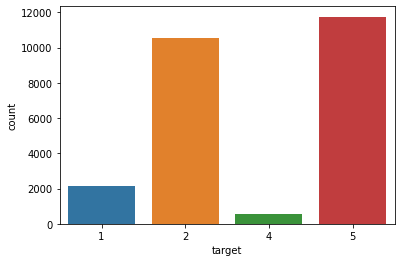

In [68]:
sns.countplot(data=submission,x='target')